In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import sklearn
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from IPython.display import Image
%matplotlib inline

In [71]:
listings = pd.read_csv('~/Dropbox/ML/data/Airbnb_Seattle/listings.csv')

In [72]:
listings.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

In [150]:
df = listings[["host_response_rate", "host_acceptance_rate", "host_is_superhost",
               "host_listings_count", "zipcode", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price", "number_of_reviews", "review_scores_rating", "cancellation_policy", 
               "reviews_per_month"]]

In [151]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,96%,100%,f,3.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,207,95.0,moderate,4.07
1,98%,100%,t,6.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$150.00,43,96.0,strict,1.48
2,67%,100%,f,2.0,98119,House,Entire home/apt,11,4.5,5.0,7.0,$975.00,20,97.0,strict,1.15
3,NaN,NaN,f,1.0,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,$100.00,0,NaN,flexible,NaN
4,100%,NaN,f,2.0,98119,House,Entire home/apt,6,2.0,3.0,3.0,$450.00,38,92.0,strict,0.89


In [152]:
# % of NaN values
(len(df)-df.count())/len(df)*100

host_response_rate      13.698271
host_acceptance_rate    20.246202
host_is_superhost        0.052383
host_listings_count      0.052383
zipcode                  0.183342
property_type            0.026192
room_type                0.000000
accommodates             0.000000
bathrooms                0.419068
bedrooms                 0.157150
beds                     0.026192
price                    0.000000
number_of_reviews        0.000000
review_scores_rating    16.946045
cancellation_policy      0.000000
reviews_per_month       16.422211
dtype: float64

In [153]:
# drop NaN rows

In [154]:
df2=df.dropna(axis=0)

In [155]:
# % of rows droppped
(len(df)-len(df2))/len(df)*100

30.434782608695656

In [156]:
df2['host_response_rate'] = df2['host_response_rate'].astype(str)
df2['host_acceptance_rate'] = df2['host_acceptance_rate'].astype(str)
df2['price'] = df2['price'].astype(str)

In [157]:
# clean data
pd.options.mode.chained_assignment = None  # default='warn'
df2['host_acceptance_rate'] = df2['host_acceptance_rate'].str.replace("%", "").astype("float")
df2['price'] = df2['price'].str.replace("[$, ]", "").astype("float")
df2['host_response_rate'] = df2['host_response_rate'].str.replace("%", "").astype("float")


In [158]:
df2.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,96.0,100.0,f,3.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,85.0,207,95.0,moderate,4.07
1,98.0,100.0,t,6.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,150.0,43,96.0,strict,1.48
2,67.0,100.0,f,2.0,98119,House,Entire home/apt,11,4.5,5.0,7.0,975.0,20,97.0,strict,1.15
6,100.0,100.0,t,1.0,98119,House,Private room,2,1.0,1.0,1.0,80.0,58,99.0,moderate,2.46
7,100.0,100.0,t,5.0,98119,Cabin,Private room,2,1.0,1.0,1.0,60.0,173,97.0,strict,4.73


In [159]:
df2.dtypes

host_response_rate      float64
host_acceptance_rate    float64
host_is_superhost        object
host_listings_count     float64
zipcode                  object
property_type            object
room_type                object
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
price                   float64
number_of_reviews         int64
review_scores_rating    float64
cancellation_policy      object
reviews_per_month       float64
dtype: object

In [160]:
df2['superhost']=np.where(df2['host_is_superhost']=='t',1,0)

In [161]:
del df2['host_is_superhost']

In [162]:
# select non-numeric variables and create dummies
non_num_vars = df2.select_dtypes(include=['object']).columns
df2[non_num_vars].head()

,zipcode,property_type,room_type,cancellation_policy
0,98119,Apartment,Entire home/apt,moderate
1,98119,Apartment,Entire home/apt,strict
2,98119,House,Entire home/apt,strict
6,98119,House,Private room,moderate
7,98119,Cabin,Private room,strict


In [163]:
dummy_vars = pd.get_dummies(df2[non_num_vars])

In [164]:
dummy_vars.head()

,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [165]:
# drop non-numeric variables from df2 and add the dummies
df3=df2.drop(non_num_vars,axis=1)
df3 = pd.merge(df3,dummy_vars, left_index=True, right_index=True)
df3.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,96.0,100.0,3.0,4,1.0,1.0,1.0,85.0,207,95.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,98.0,100.0,6.0,4,1.0,1.0,1.0,150.0,43,96.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,67.0,100.0,2.0,11,4.5,5.0,7.0,975.0,20,97.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,100.0,100.0,1.0,2,1.0,1.0,1.0,80.0,58,99.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,100.0,100.0,5.0,2,1.0,1.0,1.0,60.0,173,97.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Summary Statistics

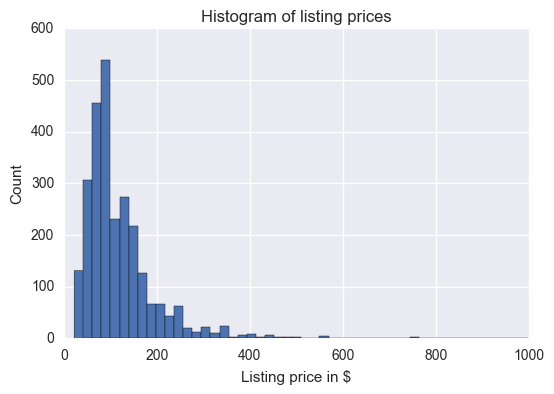

In [140]:
# Some summary stats
df3['price'].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices')

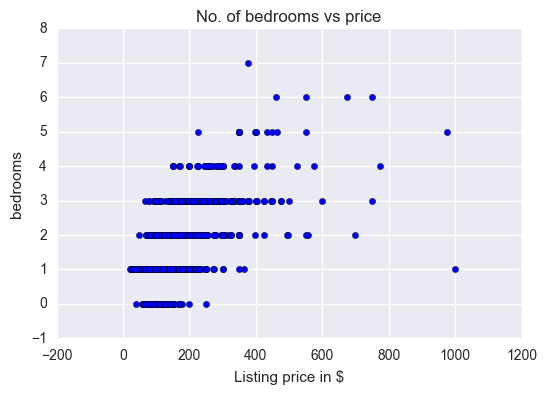

In [143]:
plt.scatter(df3['price'],df3['bedrooms'])
plt.ylabel('bedrooms')
plt.xlabel('Listing price in $')
plt.title('No. of bedrooms vs price')

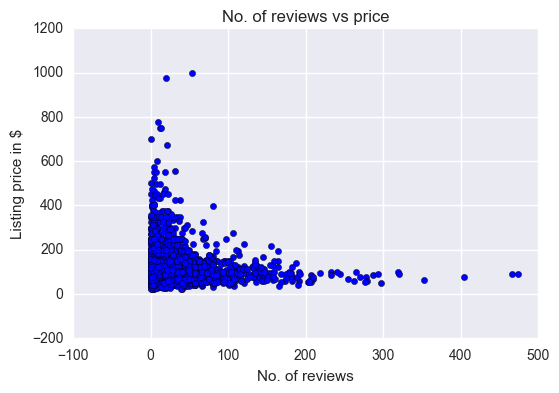

In [145]:
plt.scatter(df3['number_of_reviews'],df3['price'])
plt.ylabel('Listing price in $')
plt.xlabel('No. of reviews')
plt.title('No. of reviews vs price')

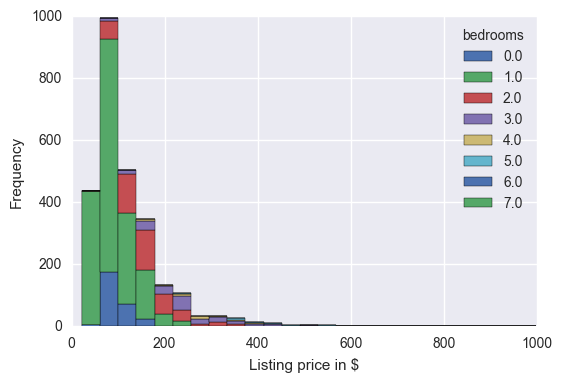

In [148]:
df3.pivot(columns = 'bedrooms',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlabel('Listing price in $')

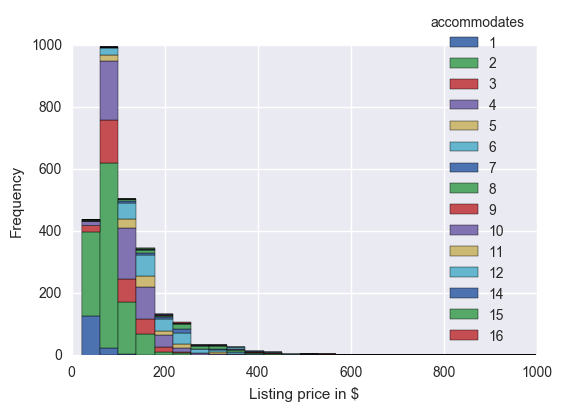

In [149]:
df3.pivot(columns = 'accommodates',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlabel('Listing price in $')

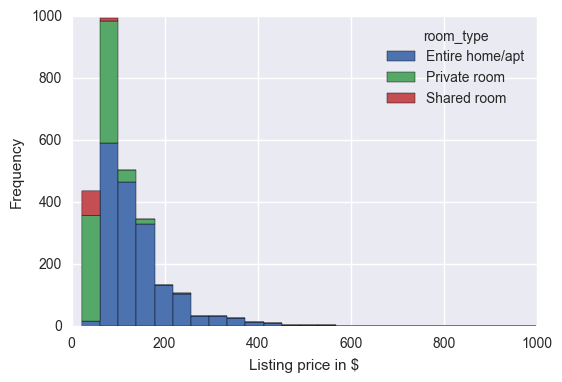

In [166]:
df2.pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=25)
plt.xlabel('Listing price in $')

some more plots

In [167]:
df3.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,96.0,100.0,3.0,4,1.0,1.0,1.0,85.0,207,95.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,98.0,100.0,6.0,4,1.0,1.0,1.0,150.0,43,96.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,67.0,100.0,2.0,11,4.5,5.0,7.0,975.0,20,97.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,100.0,100.0,1.0,2,1.0,1.0,1.0,80.0,58,99.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,100.0,100.0,5.0,2,1.0,1.0,1.0,60.0,173,97.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [171]:
cols = ['number_of_reviews','host_acceptance_rate','host_listings_count','accommodates',
       'bathrooms','bedrooms','beds','price']

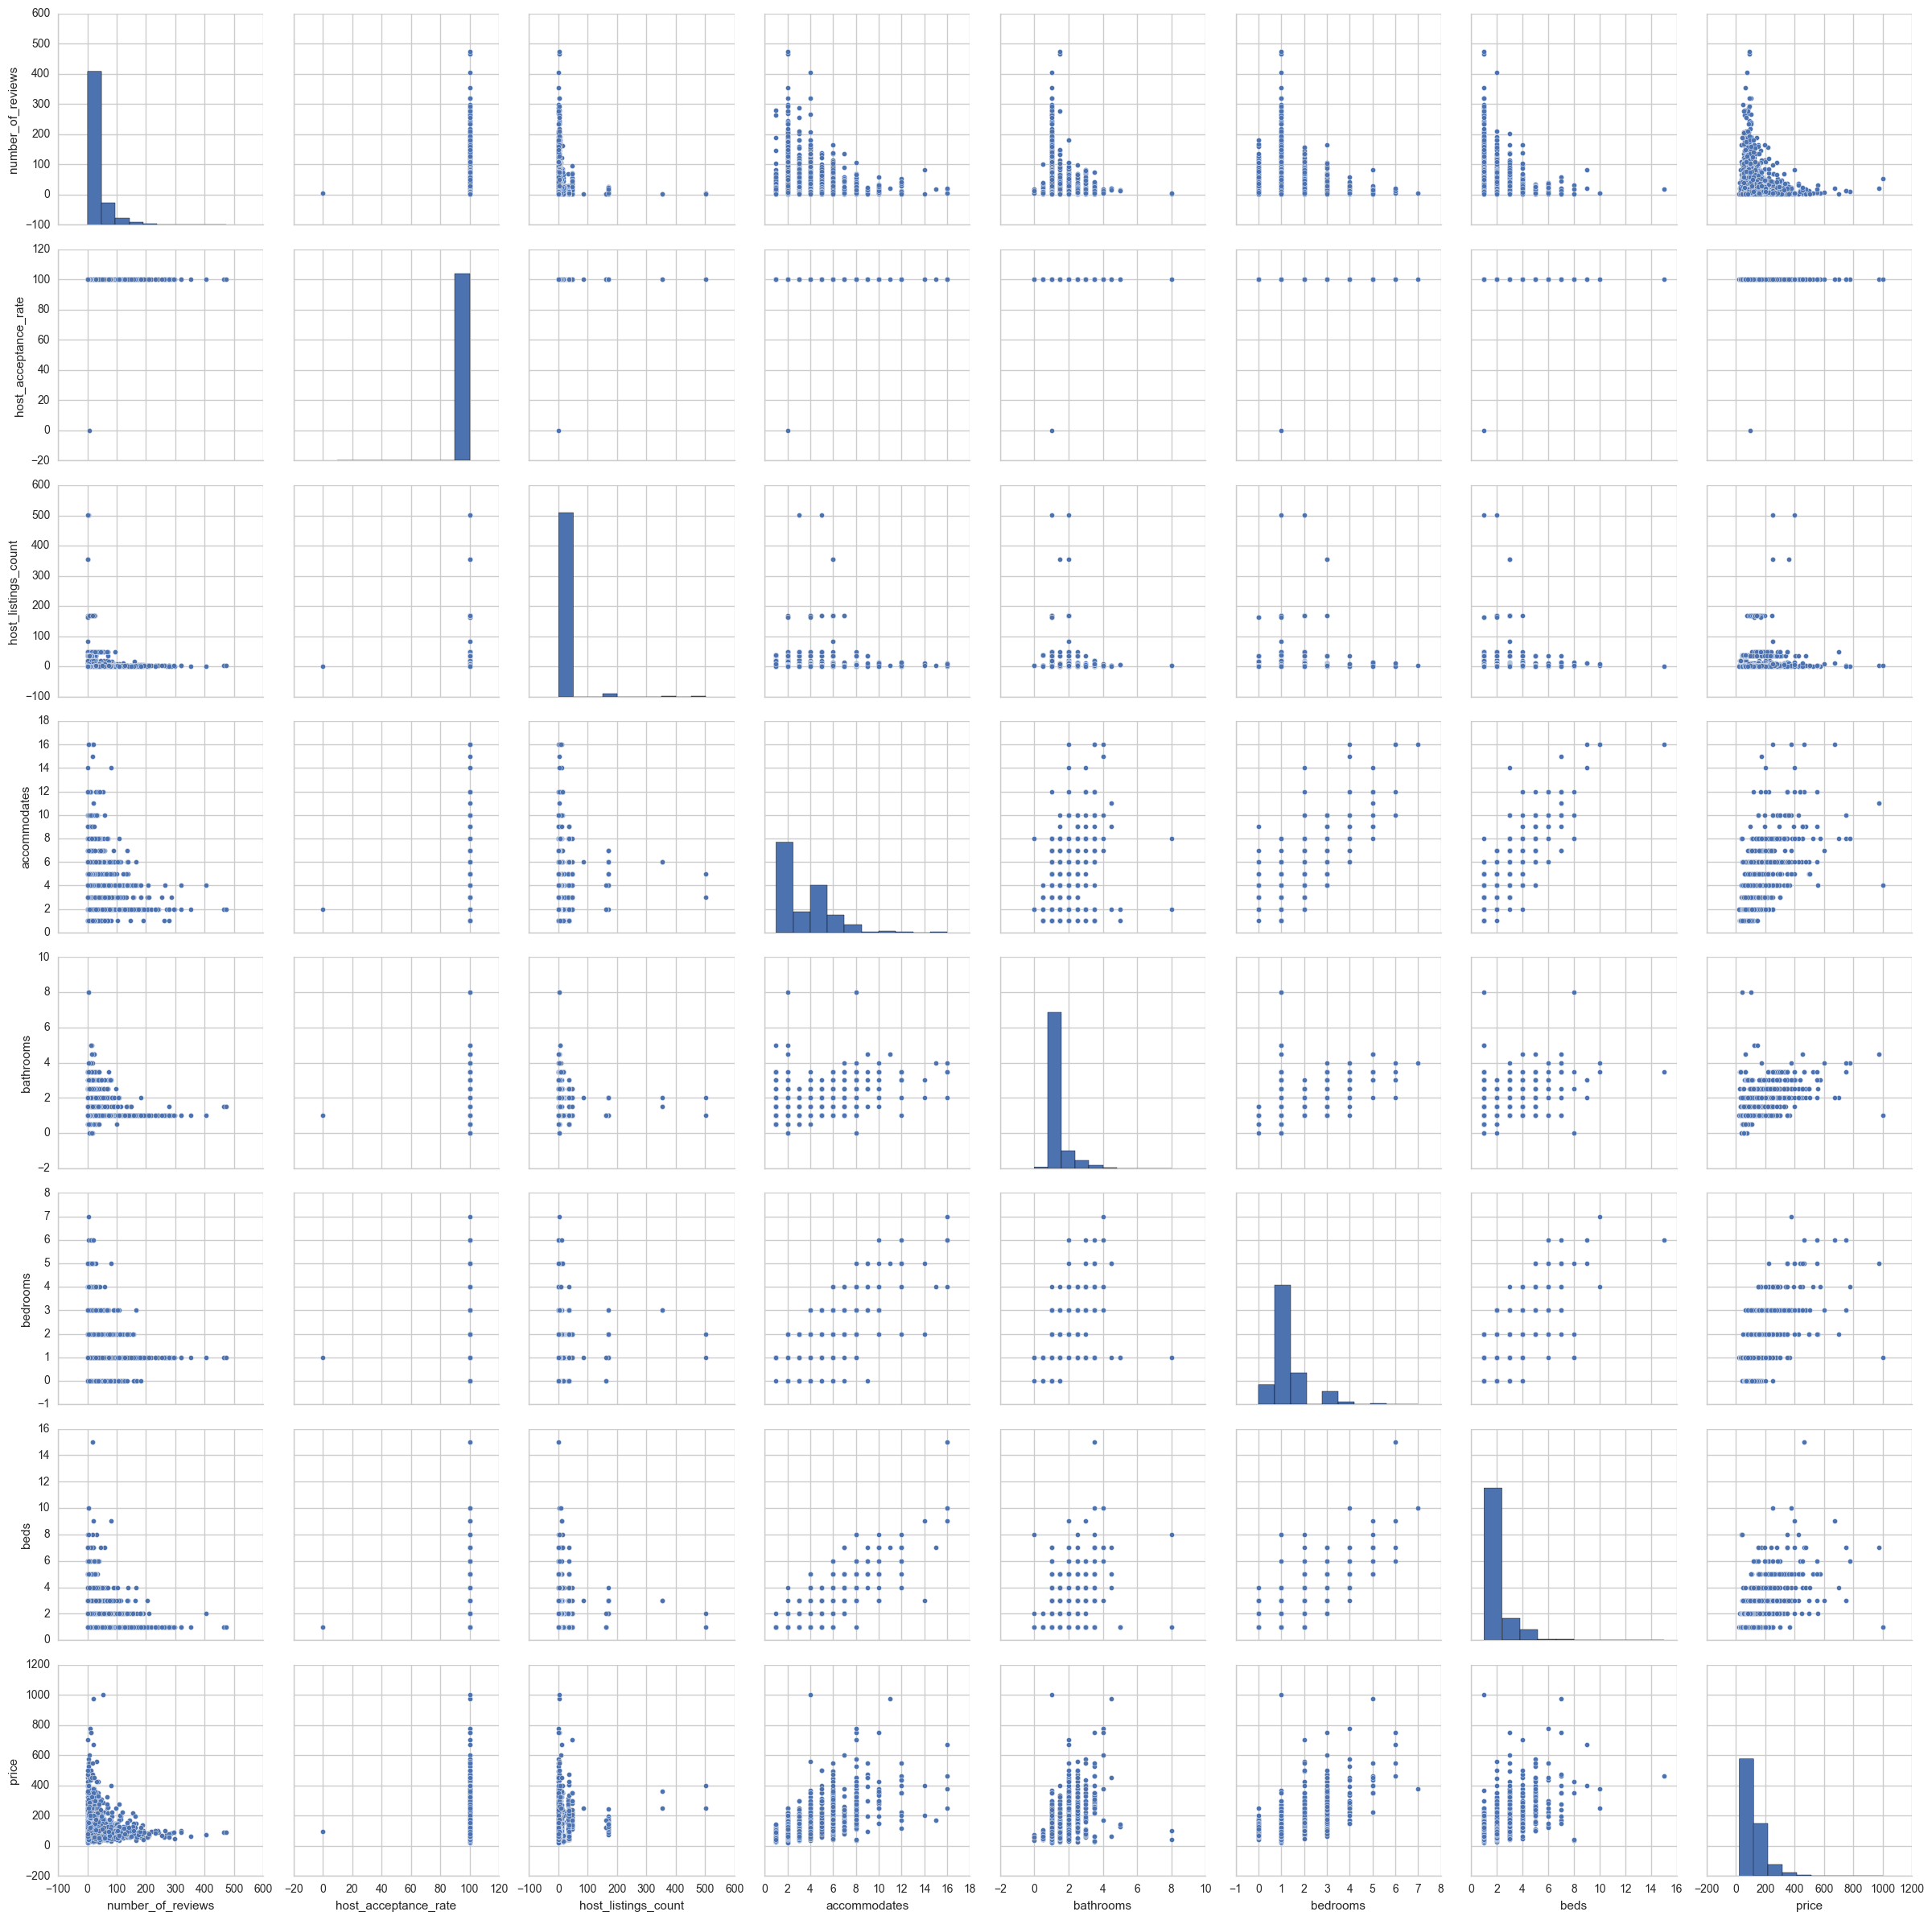

In [173]:
sns.set(style = 'whitegrid',context = 'notebook')
sns.pairplot(df3[cols],size=3)
plt.show()

## Heatmap

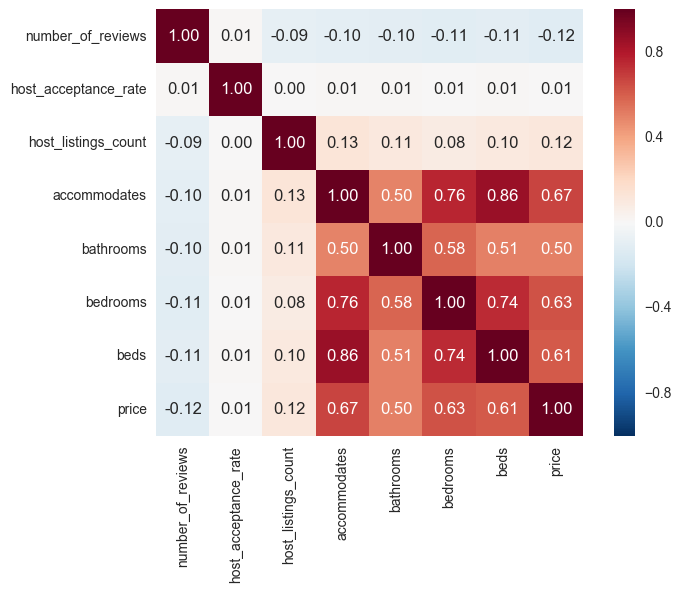

In [175]:
corrs = np.corrcoef(df3[cols].values.T)
sns.set(font_scale=1)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols)

As expected, there is a very high correlation between no. of bedrooms, beds, bathrooms and accommodates. This has to be taken into account in the regression analysis.

# Linear Regression

In [198]:
# split into test and training data
np.random.seed(1)
indices = np.random.permutation(len(df3))
train_size = int(round(0.8*len(df3)))
test_size = len(df3)-train_size

In [225]:
y = df3['price']
x = df3.drop('price', axis =1)

In [226]:
x.train = x.iloc[indices[0:train_size]]
y.train = y.iloc[indices[0:train_size]]
x.test = x.iloc[indices[train_size+1:]]
y.test = y.iloc[indices[train_size+1:]]

In [230]:
x2 = x.train.as_matrix()
y2 = y.train.as_matrix()

In [235]:
import statsmodels.api as sm
olsmod = sm.OLS(y2,x2)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     73.20
Date:                Thu, 09 Feb 2017   Prob (F-statistic):               0.00
Time:                        11:29:15   Log-Likelihood:                -11196.
No. Observations:                2125   AIC:                         2.251e+04
Df Residuals:                    2067   BIC:                         2.284e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.1913      0.100     -1.922      0.0

# Prediction

In [291]:
x0 = x.test.as_matrix()
y0 = y.test.as_matrix()

In [292]:
ypred = olsres.predict(x0) # out of sample prediction
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_ols = sqrt(mean_squared_error(y0,ypred))

Root Mean Squared Error

In [293]:
rms_ols

56.38292278388188

In [294]:
# plot predictions agains true values as function of bedrooms
beds = x.test['bedrooms'].as_matrix()

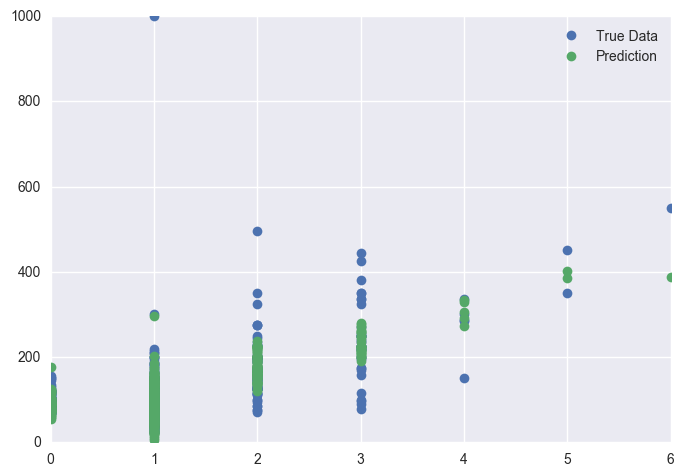

In [295]:
fig, ax = plt.subplots()
ax.plot(beds,y0, 'o', label = 'True Data')
ax.plot(beds, ypred, 'o', label = 'Prediction')
ax.legend(loc = 'best')

## different method

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [297]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

In [298]:
slr = LinearRegression()

In [299]:
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

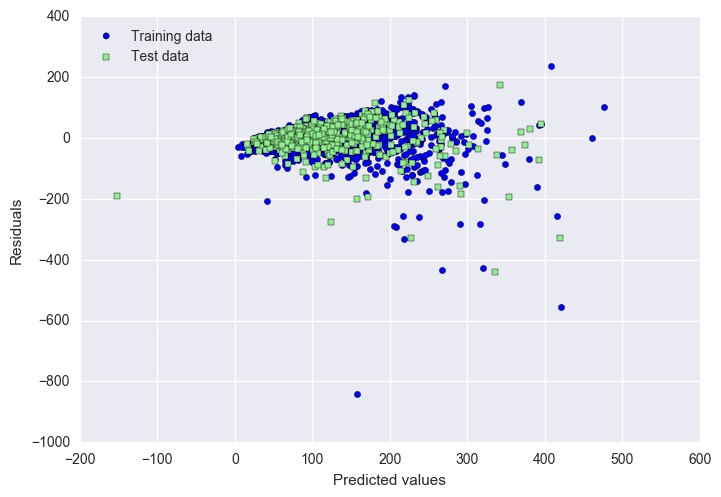

In [300]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

Evaluate model

In [266]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 2531.745, test: 2357.700
R^2 train: 0.613, test: 0.658


In [301]:
rms_ols2=sqrt(mean_squared_error(y_test,y_test_pred))

# Random Forest

In [302]:
from sklearn.ensemble import RandomForestRegressor

In [303]:
forest = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 360.229, test: 2275.514
R^2 train: 0.945, test: 0.670


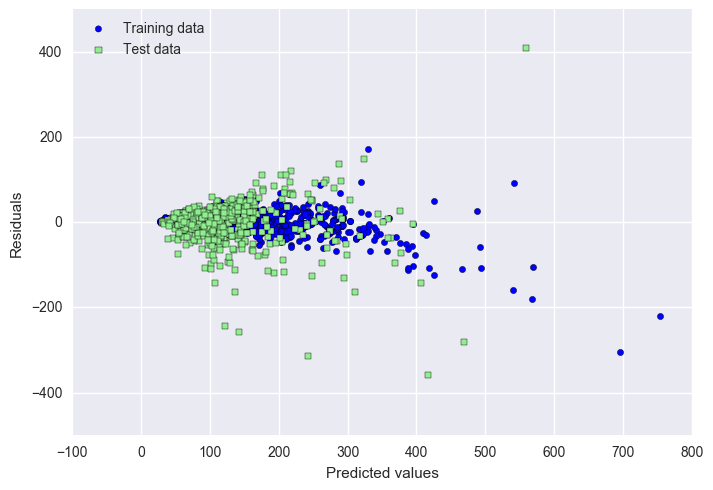

In [304]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

In [306]:
rmse_randfor=sqrt(mean_squared_error(y_test,y_test_pred))

In [311]:
compare = pd.Series( [rms_ols, rms_ols2, rmse_randfor], index = ["ols1","ols2","random forest"])

# Compare RMSE

In [313]:
compare

ols1             56.382923
ols2             48.556154
random forest    47.702347
dtype: float64